In [11]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

In [12]:
run1 = "rl-run2-det-data.json"
run2 = "rl-run2-dqn-2-data.json"


data = defaultdict(list),defaultdict(list)
for i,run in enumerate([run1,run2]):
    with open(run, "r") as f:
        data_new = json.load(f)
        for map_name in data_new:
            data[i][map_name] = data[i][map_name]+data_new[map_name]

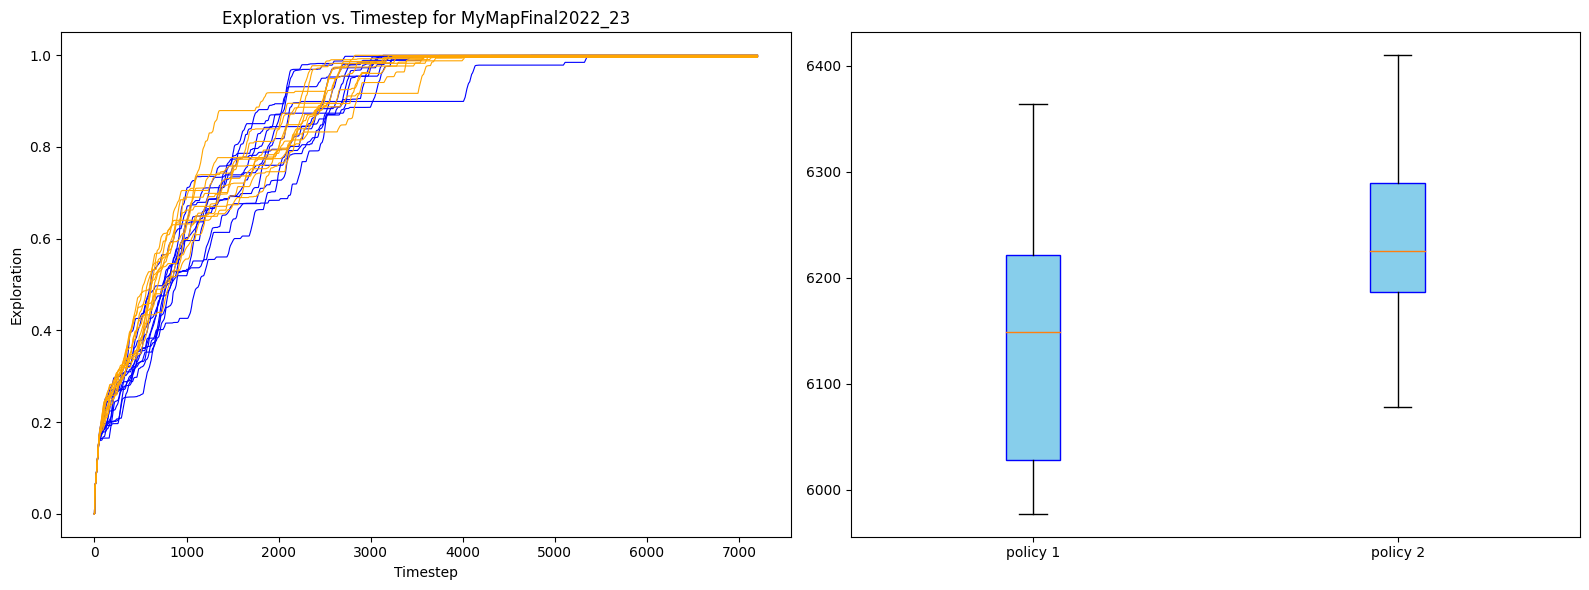

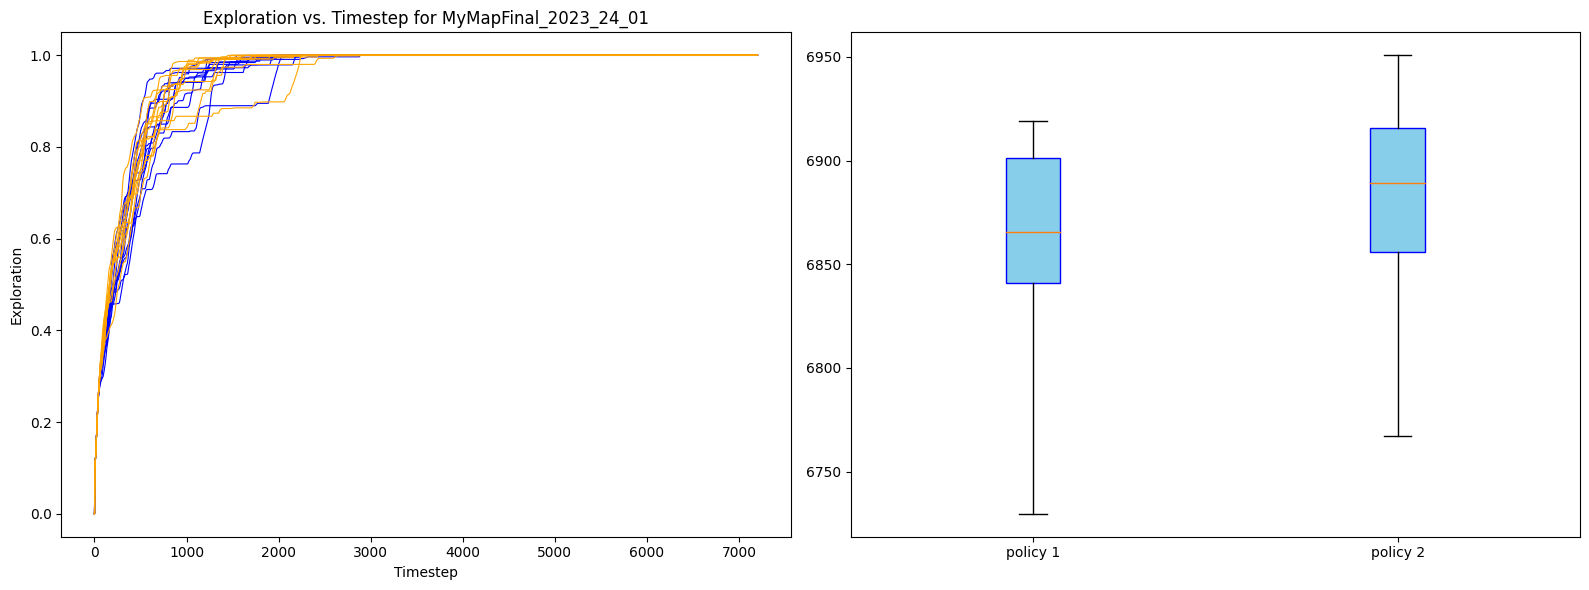

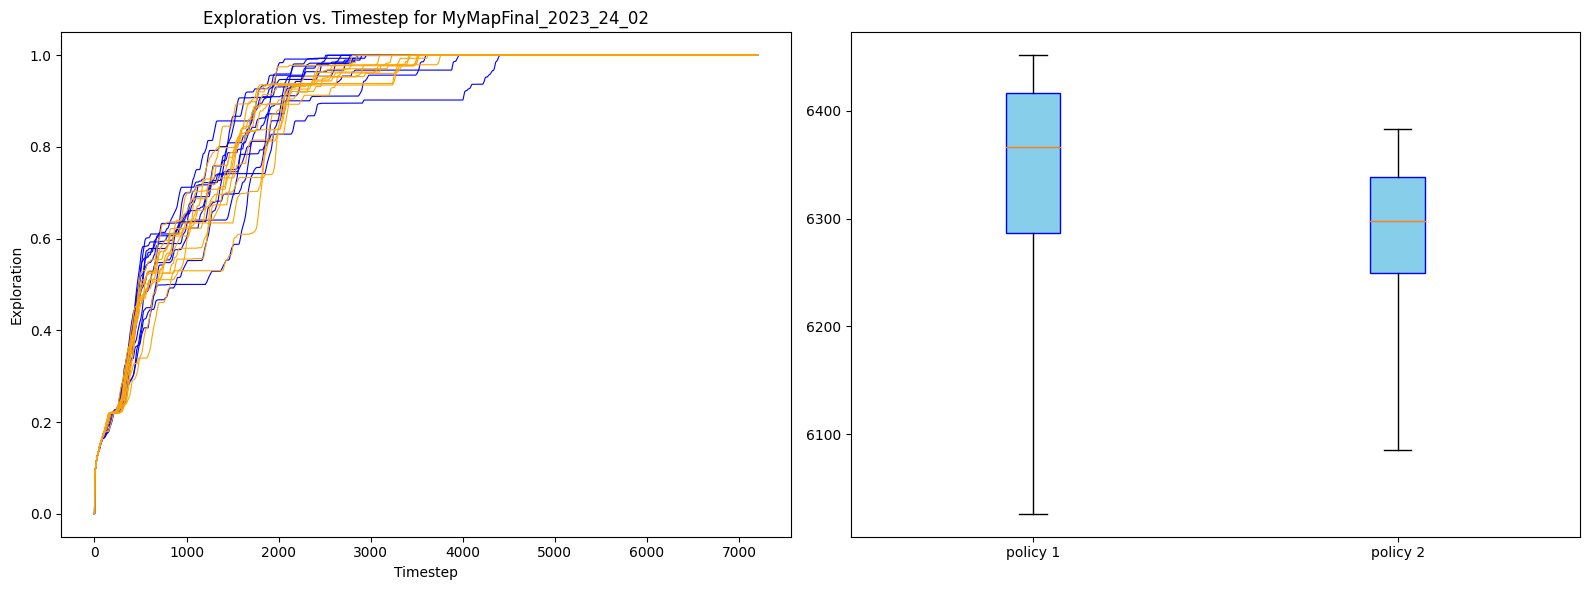

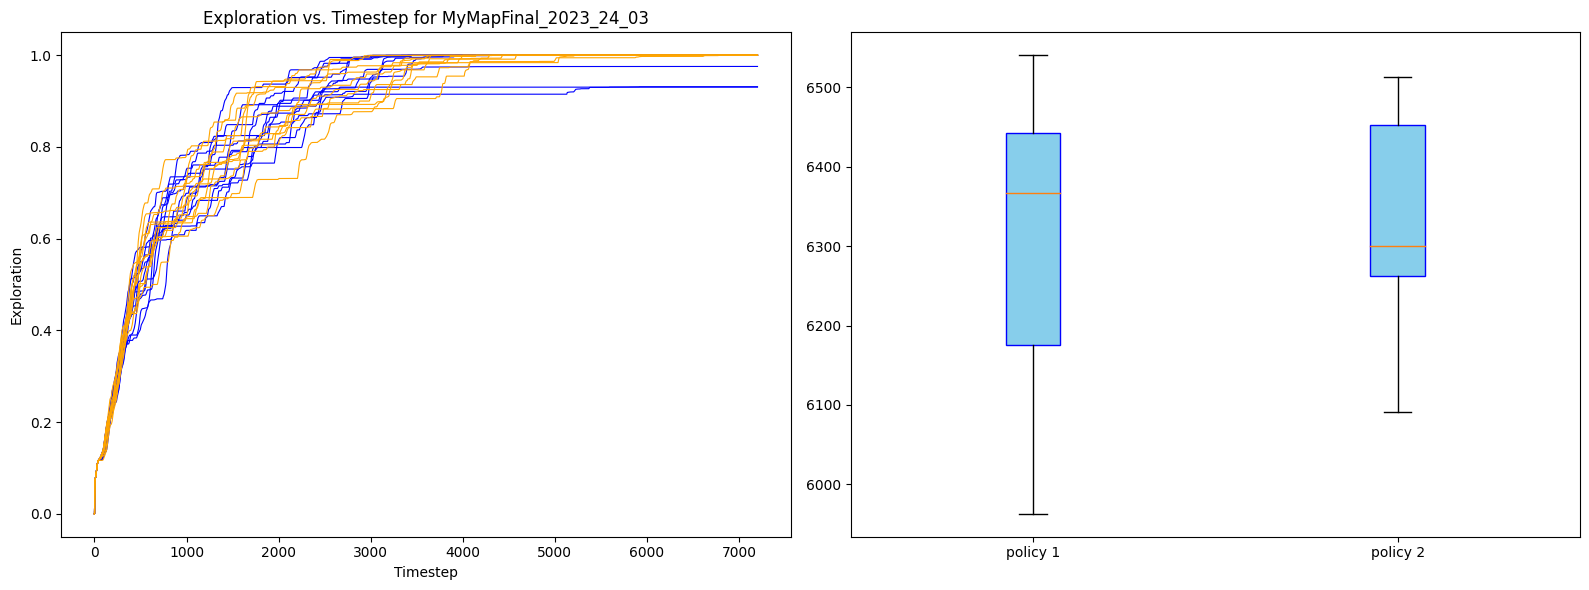

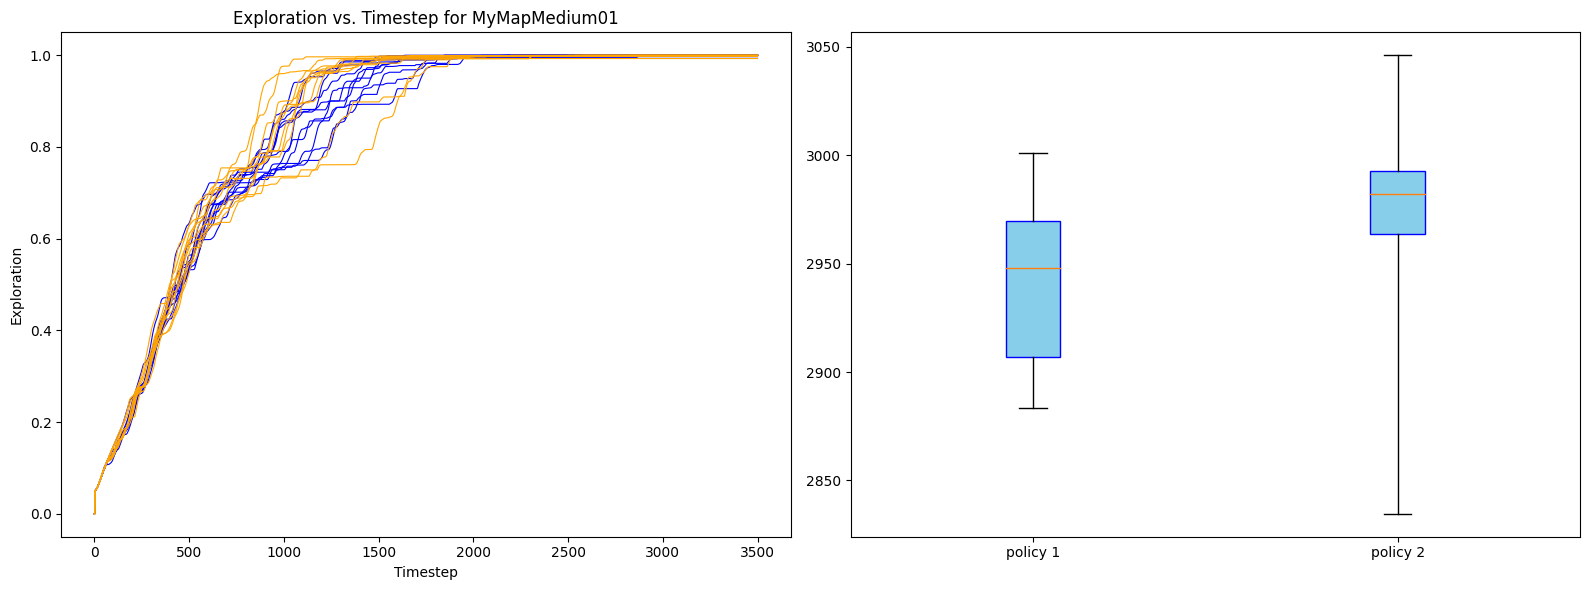

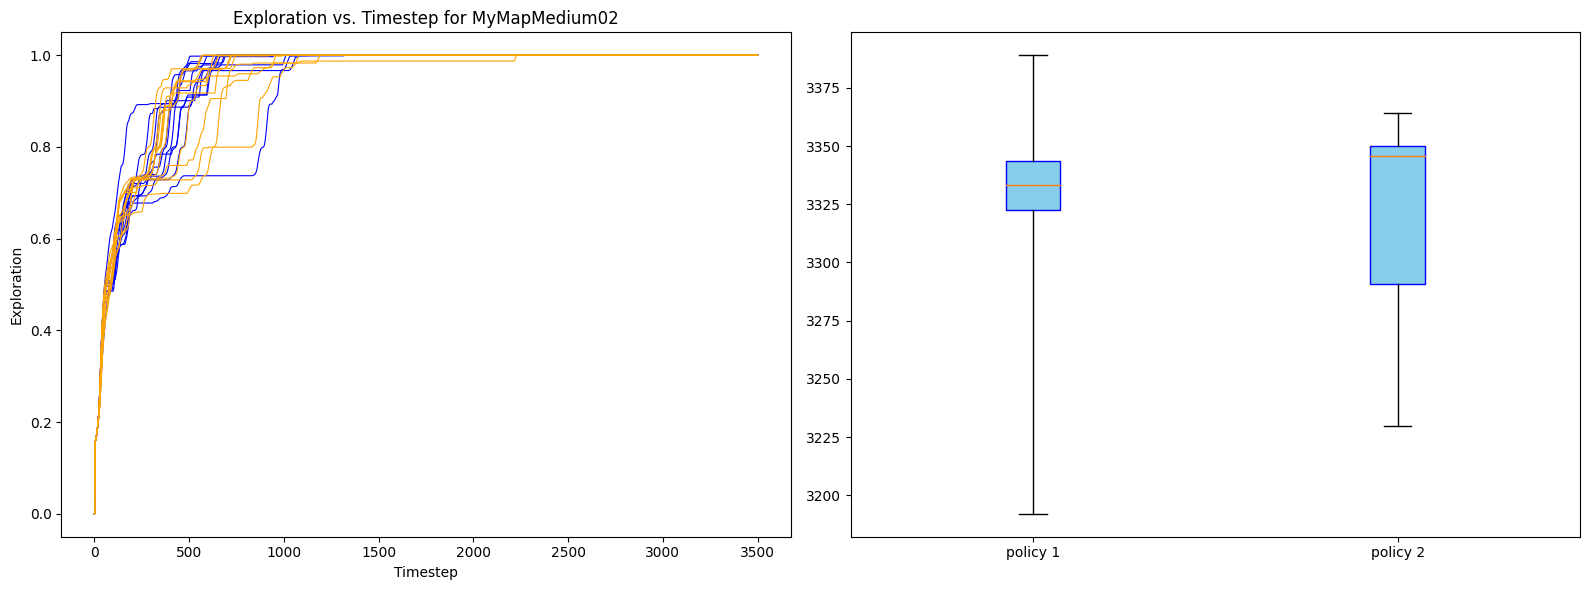

In [16]:
for map_name in data[0]:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot the exploration in respect to timestep (Left plot)
    ax1.set_title(f"Exploration vs. Timestep for {map_name}")

    # Define fixed colors for the two policies
    policy1_color = 'blue'
    policy2_color = 'orange'

    # Plot for Policy 1
    for i in range(len(data[0][map_name])):
        if data[0][map_name][i]["info"]["epsilon"] > 0:
            continue
        ax1.plot(
            data[0][map_name][i]["score"],
            linewidth=0.8,
            color=policy1_color,  # Set the color explicitly
        )

    # Plot for Policy 2
    for i in range(len(data[1][map_name])):
        if data[1][map_name][i]["info"]["epsilon"] > 0:
            continue
        ax1.plot(
            data[1][map_name][i]["score"],
            linewidth=0.8,
            color=policy2_color,  # Set the color explicitly
        )

    # Add the legend
    ax1.set_xlabel("Timestep")
    ax1.set_ylabel("Exploration")

    
    scores = []
    for i in range(2):
        scores.append([
            sum(data[i][map_name][k]["score"]) for k in range(len(data[i][map_name])) if data[i][map_name][k]["info"]["epsilon"]==0
        ])
    ax2.boxplot(scores, labels=["policy 1", "policy 2"], patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

In [14]:
def get_timesteps(data):
    timesteps = defaultdict(list)
    for map_name in data:
        for i in range(len(data[map_name])):
            if data[map_name][i]["info"]["epsilon"] > 0:
                continue
            for k in range(len(data[map_name][i]["score"])):
                if data[map_name][i]["score"][k]>=0.99 or k == len(data[map_name][i]["score"])-1:
                    timesteps[map_name].append(k)
                    break
    return timesteps

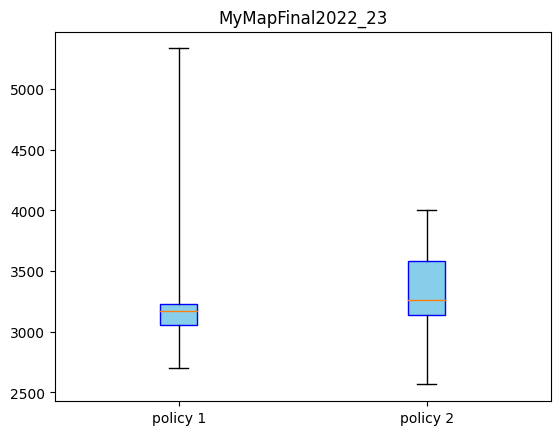

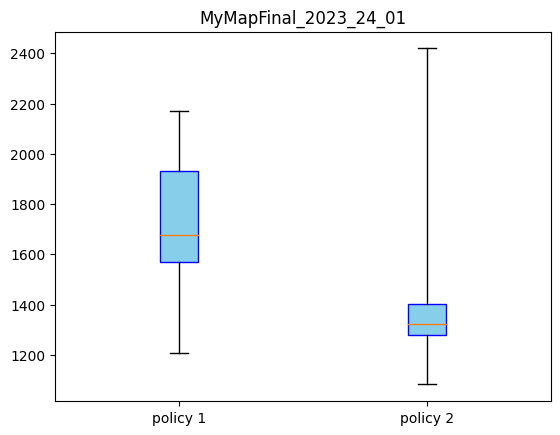

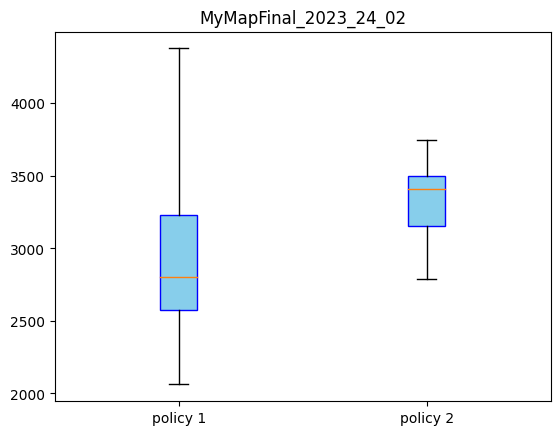

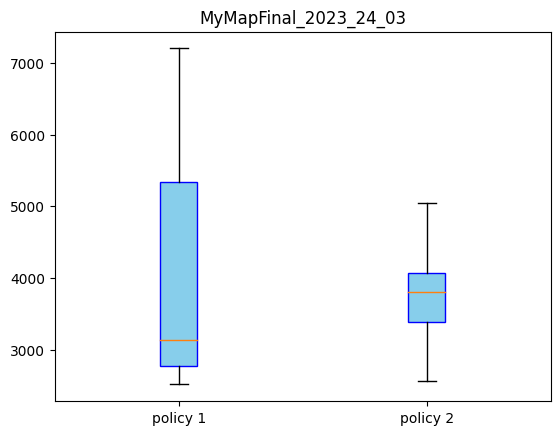

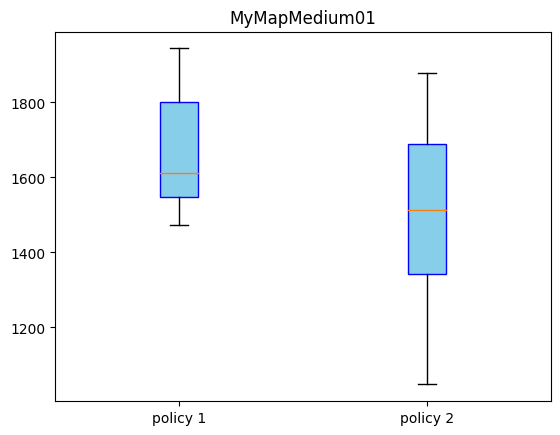

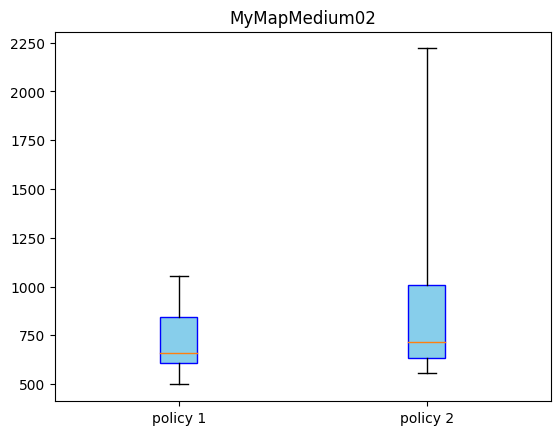

In [15]:
timesteps = get_timesteps(data[0]),get_timesteps(data[1])
for map_name in timesteps[0]:
    plt.figure()
    plt.title(map_name)
    plt.boxplot((timesteps[0][map_name],timesteps[1][map_name]), labels=["policy 1", "policy 2"], patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
plt.show()